In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('shoe.csv')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [4]:
df.shape

(40, 2)

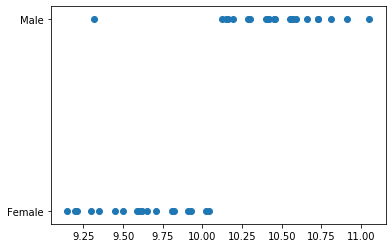

In [5]:
plt.scatter(df['size(cm)'],df['class(y)'])

In [6]:
y = df['class(y)']
x = df[['size(cm)']]

In [7]:
x.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [8]:
y.head()

0    Female
1      Male
2      Male
3    Female
4      Male
Name: class(y), dtype: object

In [9]:
y = df['class(y)'].replace(['Female','Male'],[0,1])

In [10]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class(y), dtype: int64

In [11]:
from sklearn.model_selection import train_test_split as tts

In [12]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=1)

In [13]:
xtrain.shape

(28, 1)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logit = LogisticRegression()

In [16]:
logit.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
logit.coef_

array([[0.0820095]])

In [18]:
logit.intercept_

array([-0.59660731])

In [19]:
from IPython.display import Image

In [20]:
#Image('logit.png')

In [21]:
logit.predict_proba(xtest)

array([[0.43607388, 0.56392612],
       [0.44618258, 0.55381742],
       [0.44820995, 0.55179005],
       [0.45755701, 0.54244299],
       [0.42802458, 0.57197542],
       [0.42963154, 0.57036846],
       [0.46061176, 0.53938824],
       [0.45816771, 0.54183229],
       [0.43244726, 0.56755274],
       [0.43849545, 0.56150455],
       [0.43627556, 0.56372444],
       [0.44577732, 0.55422268]])

In [22]:
logit.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
ytest

2     1
31    0
3     0
21    0
27    1
29    1
22    0
39    1
19    1
26    1
32    1
17    0
Name: class(y), dtype: int64

In [24]:
logit.score(xtest,ytest)

0.5833333333333334

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

In [26]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [27]:
KNN.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [28]:
np.array(ytest)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [29]:
df.tail()

,size(cm),class(y)
35,9.30,Female
36,9.21,Female
37,10.56,Male
38,9.60,Female
39,9.32,Male


# SVM

In [30]:
from sklearn import svm
sv = svm.SVC(kernel='linear')

In [31]:
sv.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
sv.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [33]:
sv.score(xtest,ytest)

0.9166666666666666